In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix

import warnings
warnings.simplefilter("ignore")

In [2]:
ruta_base = "../DATOS"

In [3]:
datos = pd.read_csv(f'{ruta_base}/Base_datos_comp.csv', ',', index_col=0)

X = datos.drop(['AirTempCategory'], axis=1)
y = datos['AirTempCategory']

In [4]:
datos

,LandCover,Wind,DEM,NDVI,Clouds,Temp,Eva,Eva_plant,AirTempCategory
405,40.0,4.404931,39.0,0.69,0.473909,27.549194,-0.003469,-4.380238e-05,0
406,40.0,4.108960,49.0,0.77,0.480379,27.544739,-0.003545,-1.457122e-05,0
1328,40.0,3.921639,14.0,0.78,0.538886,27.015350,-0.004009,-1.720466e-05,0
1395,50.0,3.284423,45.0,0.77,0.595392,26.776520,-0.003976,4.656613e-10,0
1396,11.0,2.966187,79.0,0.78,0.636385,26.358978,-0.004067,4.656613e-10,0
...,...,...,...,...,...,...,...,...,...
664657,50.0,1.179073,2368.0,0.81,0.785024,16.397888,-0.003265,4.656613e-10,0
664716,50.0,0.957614,737.0,0.77,0.786089,20.228333,-0.003138,4.656613e-10,0
664847,30.0,0.910709,805.0,0.79,0.795860,17.989594,-0.003124,4.656613e-10,0
664909,50.0,0.887851,1225.0,0.85,0.841868,16.256653,-0.003198,4.656613e-10,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy=1)
X_train, y_train = rus.fit_resample(X_train,y_train)

## 1) Análisis discriminante:

Análisis discriminante lineal es una técnica estadística para clasificación binaria o multiclases, que asume una distribución gausiana de las variables de entrada.

### - LDA:

La implementación de LDA se realiza de la siguiente manera. En este caso se quiere obtener 2 funciones discriminantes (n_components).

In [299]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(solver="eigen", store_covariance=True)
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)

(190, 1)


In [300]:
y_pred  = LDA.predict(X_test)
#calcular la probabilidad para cada clase
y_prob  = LDA.predict_proba(X_train)
prob_si = LDA.predict_proba(X_train)[:,1]
# y_prob, prob_si

In [302]:
#Exactitud del modelo
print('Accuracy de LDA para validación: {:.2f}'.format(LDA.score(X_test, y_test)))

#Matriz de confusion
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

#Reporte de clasificación
print(classification_report(y_test, y_pred))
results = cross_val_score(LDA, X_train, y_train, cv=6, scoring='roc_auc')
print(results)
print('La precisión del modelo es:', np.round(results.mean()*100, 2), '%')


Accuracy de LDA para validación: 0.58
[[1016  752]
 [  11   21]]
              precision    recall  f1-score   support

           0       0.99      0.57      0.73      1768
           1       0.03      0.66      0.05        32

    accuracy                           0.58      1800
   macro avg       0.51      0.62      0.39      1800
weighted avg       0.97      0.58      0.72      1800

[0.71484375 0.79296875 0.68359375 0.75390625 0.67916667 0.60416667]
La precisión del modelo es: 70.48 %


In [27]:
kfold = ShuffleSplit(n_splits=5)
results = cross_val_score(LDA, X_train, y_train, cv=kfold)
print(results)
print('La precisión del modelo es:', np.round(results.mean()*100, 2), '%')
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))
print('La precisión del modelo es:', np.round(results.mean()*100, 2), '%')


[0.63157895 0.57894737 0.57894737 0.52631579 0.57894737]
La precisión del modelo es: 57.89 %
[[1122  644]
 [  16   18]]
              precision    recall  f1-score   support

           0       0.99      0.64      0.77      1766
           1       0.03      0.53      0.05        34

    accuracy                           0.63      1800
   macro avg       0.51      0.58      0.41      1800
weighted avg       0.97      0.63      0.76      1800

La precisión del modelo es: 57.89 %


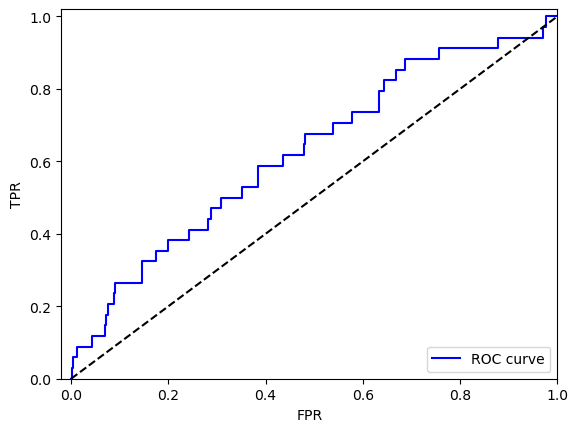

In [58]:
from sklearn.metrics import roc_curve

probs=LDA.predict_proba(X_test)
y_pred_proba = probs[:,1]
                     
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

### - Componentes principales:

[0.99856533 0.00142936]


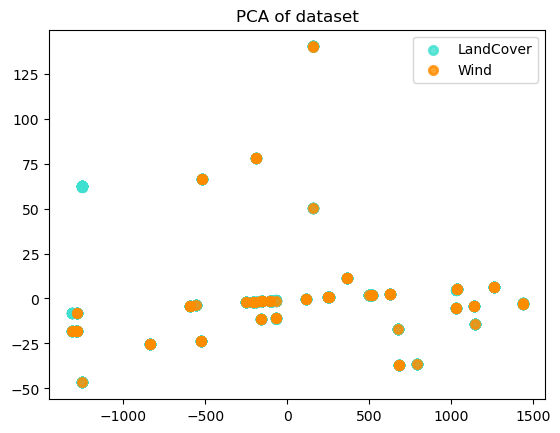

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2,  svd_solver='full') # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
X_r = pca.fit(X).transform(X)
print(pca.explained_variance_ratio_)

plt.figure()
colors = ["turquoise", "darkorange"]
lw = 2
target_names = ['LandCover', 'Wind', 'DEM', 'NDVI', 'Clouds', 'Temp', 'Eva', 'AirTempCategory']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of dataset")
plt.show()

## 2) Regresión logística:

El modelo de RL corresponde a un modelo supervisado para clasificaciones.

### Statsmodels
Al igual que en el caso de modelos lineales, una buena opción es la librería statsmodels, ya que arroja la hoja de resultados con diferentes métricas que permiten conocer los resultados directamente.

In [6]:
import statsmodels.api as sm
model1  = sm.Logit(y_train,X_train)
result1 = model1.fit(method='powell')
print(result1.summary())
result1.params

Optimization terminated successfully.
         Current function value: 0.623210
         Iterations: 16
         Function evaluations: 1313
                           Logit Regression Results                           
Dep. Variable:        AirTempCategory   No. Observations:                  186
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            6
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.1009
Time:                        06:49:45   Log-Likelihood:                -115.92
converged:                       True   LL-Null:                       -128.93
Covariance Type:            nonrobust   LLR p-value:                 0.0002211
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LandCover      0.0096      0.006      1.525      0.127      -0.003    

LandCover      0.009614
Wind          -0.180610
DEM            0.001032
NDVI          -2.038526
Clouds        -5.347048
Temp           0.198827
Eva         -116.711985
dtype: float64

In [17]:
X_2 = datos.drop(['AirTempCategory', 'LandCover', 'NDVI'], axis=1)
y = datos['AirTempCategory']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y,test_size=0.3)
rus=RandomUnderSampler(sampling_strategy=1)
X_train_2, y_train_2 = rus.fit_resample(X_train_2,y_train_2)

In [18]:
model2  = sm.Logit(y_train_2,X_train_2)
result2 = model2.fit(maxiter=15, method='powell')  # maxiter --> argumento de máximas interacciones
print(result2.summary())
result2.params

Optimization terminated successfully.
         Current function value: 0.644404
         Iterations: 6
         Function evaluations: 366
                           Logit Regression Results                           
Dep. Variable:        AirTempCategory   No. Observations:                  188
Model:                          Logit   Df Residuals:                      183
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                 0.07032
Time:                        06:56:31   Log-Likelihood:                -121.15
converged:                       True   LL-Null:                       -130.31
Covariance Type:            nonrobust   LLR p-value:                  0.001065
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Wind          -0.4456      0.608     -0.733      0.464      -1.637      

Wind       -0.445555
DEM         0.000467
Clouds     -4.842006
Temp        0.061800
Eva      -789.126546
dtype: float64

### Sklearn
La librería de Sklearn es más ágil en resolver los problemas de RL. Como hiperparámetro utiliza el C, el cual regulariza los coeficientes, de forma similar a LASSO, pero de forma 1/C. Es por esto que no se obtienen coeficientes similares que para Statsmodels, se pueden aproximar asignando un valor para regularizar muy bajo y con intercepto 0 de la siguiente forma.

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model_l1 = LogisticRegression(penalty='l1', fit_intercept=False, C=1e30, solver='liblinear')
model1   = model_l1.fit(X_train,y_train)
print(model1.coef_, model1.intercept_)

Score_train=accuracy_score(y_train, model1.predict(X_train))
print('Precision en entrenamiento:', Score_train)
Score_test=accuracy_score(y_test, model1.predict(X_test))
print('Precision en validacion:', Score_test)
print(classification_report(y_test, model1.predict(X_test)))

[[-7.66507072e-04 -1.51880080e+00  4.16337204e-04  4.52104987e-01
  -7.25857501e+00  1.59348578e-01 -1.16481113e+03]] 0.0
Precision en entrenamiento: 0.6881720430107527
Precision en validacion: 0.6355555555555555
              precision    recall  f1-score   support

           0       0.99      0.64      0.77      1766
           1       0.03      0.59      0.06        34

    accuracy                           0.64      1800
   macro avg       0.51      0.61      0.42      1800
weighted avg       0.97      0.64      0.76      1800



In [40]:
predictions_1   = model1.predict(X_test)
probabilities_1 = model1.predict_proba(X_test)[:, 1]
predictions_1, probabilities_1

(array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([0.48978084, 0.76072887, 0.45615403, ..., 0.46850731, 0.30649278,
        0.59415466]))

In [41]:
probability_1 = model1.predict_proba(X_test)[:, 1]
log_odds_1    = model1.decision_function(X_test)
classes_1     = model1.predict(X_test)

In [42]:
odds_ratio_1 = np.exp(log_odds_1)
probability_manual_1 = odds_ratio_1/(1+odds_ratio_1)

# Para chequear si ambos son iguales
np.allclose(probability_1, probability_manual_1)

True

In [44]:
results1 = cross_val_score(model1, X_train, y_train, cv=kfold)
print('Valor medio:',results1.mean())
print('Desviacion estandar:',results1.std())

Valor medio: 0.631578947368421
Desviacion estandar: 0.06657426652986059


In [45]:
X = datos.drop(['AirTempCategory'], axis=1)
y = datos['AirTempCategory']

model_l2 = LogisticRegression(penalty='l2', fit_intercept=False, C=1e30, solver='liblinear')
model2   = model_l2.fit(X_train,y_train)
print(model2.coef_, model2.intercept_)

Score_train = accuracy_score(y_train, model2.predict(X_train))
print('Precision en entrenamiento:', Score_train)
Score_test=accuracy_score(y_test, model2.predict(X_test))
print('Precision en validacion:', Score_test)
print(classification_report(y_test, model2.predict(X_test)))

[[ 9.26792058e-04 -1.35342427e+00  5.04871643e-04  5.72380502e-01
  -6.64583760e+00  1.90774370e-01 -6.96321628e+02]] 0.0
Precision en entrenamiento: 0.6827956989247311
Precision en validacion: 0.6444444444444445
              precision    recall  f1-score   support

           0       0.99      0.65      0.78      1766
           1       0.03      0.56      0.06        34

    accuracy                           0.64      1800
   macro avg       0.51      0.60      0.42      1800
weighted avg       0.97      0.64      0.77      1800



In [46]:
predictions_2   = model2.predict(X_test)
probabilities_2 = model2.predict_proba(X_test)[:, 1]
predictions_2, probabilities_2

(array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0.39682039, 0.76024022, 0.41844642, ..., 0.48041298, 0.35643436,
        0.49806987]))

In [47]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
results2 = cross_val_score(model2, X_train, y_train, cv=kfold)
print('Valor medio:',results2.mean())
print('Desviacion estandar:',results2.std())

Valor medio: 0.5758179231863443
Desviacion estandar: 0.07701569761785398


In [48]:
probability_2 = model2.predict_proba(X_test)[:, 1]
log_odds_2    = model2.decision_function(X_test)
classes_2     = model2.predict(X_test)

In [49]:
odds_ratio_2 = np.exp(log_odds_2)
probability_manual_2 = odds_ratio_2 / (1 + odds_ratio_2)

# Para chequear si ambos son iguales
np.allclose(probability_2, probability_manual_2)

True

A continuación se grafican las relaciones entre estos valores obtenidos.

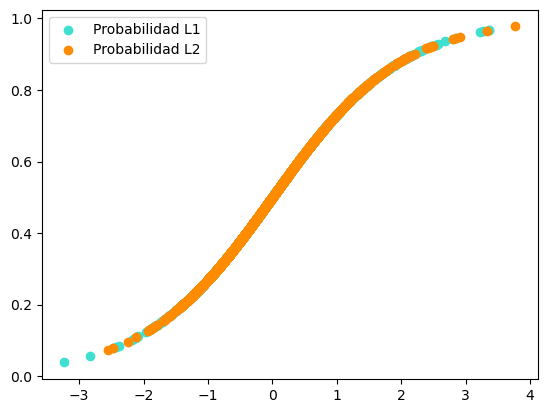

In [60]:
import matplotlib.pyplot as plt

plt.scatter(log_odds_1, probability_1, color = 'turquoise',  label = 'Probabilidad L1')
plt.scatter(log_odds_2, probability_2, color = 'darkorange', label = 'Probabilidad L2')
plt.legend()


In [50]:
df = pd.DataFrame(dict(probability=probability_1, log_odds=log_odds_1, classes=classes_1))
df.sort_values('probability')

,probability,log_odds,classes
1554,0.038067,-3.229597,0
1063,0.055871,-2.827211,0
80,0.077874,-2.471592,0
1091,0.081595,-2.420865,0
1463,0.084739,-2.379636,0
...,...,...,...
479,0.945322,2.850059,1
809,0.961902,3.228764,1
165,0.963590,3.275835,1
238,0.966511,3.362468,1


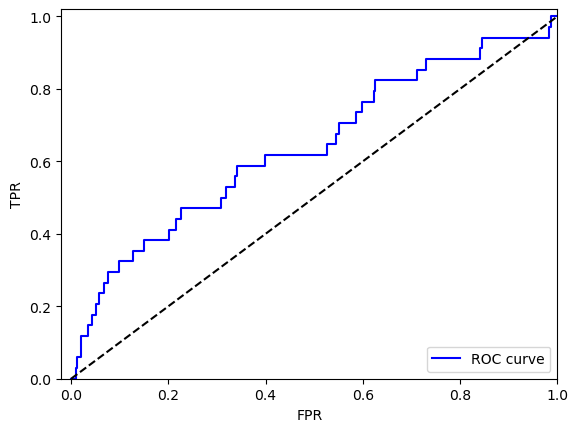

In [55]:
from sklearn.metrics import roc_curve

probs=model1.predict_proba(X_test)
y_pred_proba = probs[:,1]
                     
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

## 3) KNN:

El método KNN (K-nearest neighbors) es un método simple y poderoso de clasificación, donde K se refiere al número de observaciones mas cercanas que utilizará el algoritmo.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [72]:
y_pred=knn.predict(X_test)
y_pred[:100]

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [73]:
prediction_proba=knn.predict_proba(X_test)
prediction_proba[:10,:]

array([[0.53333333, 0.46666667],
       [0.73333333, 0.26666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.6       , 0.4       ],
       [0.4       , 0.6       ],
       [0.46666667, 0.53333333],
       [0.73333333, 0.26666667],
       [0.6       , 0.4       ],
       [0.73333333, 0.26666667]])

In [74]:
print(knn.score(X_test,y_test))

0.3988888888888889


In [75]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
kfold = ShuffleSplit(n_splits=15)
results = cross_val_score(knn, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

0.45614035087719285
0.10814761408717502


In [76]:
y_train_pred=knn.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52        93
           1       0.56      0.68      0.61        93

    accuracy                           0.57       186
   macro avg       0.57      0.57      0.56       186
weighted avg       0.57      0.57      0.56       186

              precision    recall  f1-score   support

           0       0.98      0.40      0.56      1766
           1       0.02      0.56      0.03        34

    accuracy                           0.40      1800
   macro avg       0.50      0.48      0.30      1800
weighted avg       0.96      0.40      0.55      1800



In [77]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_pred))

[[43 50]
 [30 63]]
[[ 699 1067]
 [  15   19]]


In [69]:
from sklearn.metrics import accuracy_score 
print('Precision para entrenamiento:',accuracy_score(y_train,y_train_pred))
print('Precision para validacion:',accuracy_score(y_test,y_pred))

Precision para entrenamiento: 0.5698924731182796
Precision para validacion: 0.3988888888888889


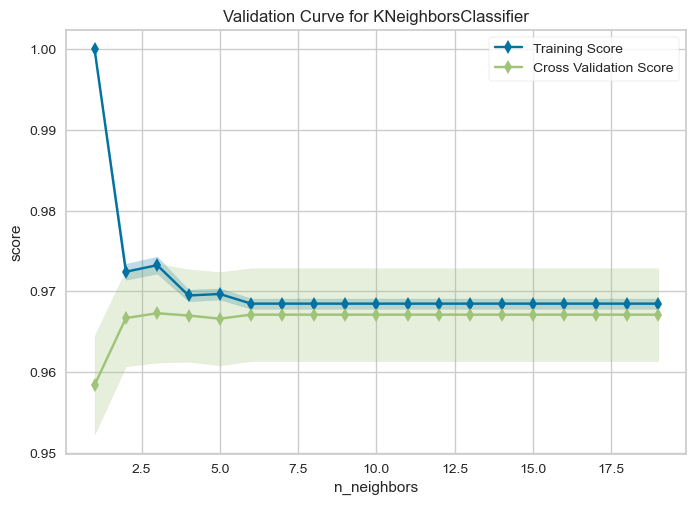

In [82]:
from yellowbrick.model_selection import ValidationCurve
param_range=np.arange(1,20)
k=ValidationCurve(KNeighborsClassifier(),param_name='n_neighbors', param_range=param_range, cv=kfold, scoring='f1_weighted',n_jobs=4)
k.fit(X,y)
k.show();

In [79]:
#Hiperparametros a evaluar.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,10))
p=[1,2]

#Realizar un diccionario con los valores a evaluar.
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

Para seleccionar los mejores hiperparámetros simultaneamente se puede utilizar el metodo **gridsearch**. Inicialmente se crea una lista con el rango de valores que se desea evaluar para cada hiperparámetro. En este caso se evaluará leaf_size, n_neighbors* y p. La distancia Minkowski es utilizada por defecto, la cual corresponde a una generalización de la distancia Euclidiana (para variables que esten en la misma escala) o la distancia Manhattan (cuando las variables difieran en sus escalas).

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_2 = KNeighborsClassifier(n_neighbors=3)
clf = GridSearchCV(knn_2, hyperparameters, cv=kfold)
best_model = clf.fit(X_train,y_train)
print('Best leaf_size:',   best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:',           best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


In [108]:
knn_best=KNeighborsClassifier(n_neighbors=1, leaf_size=3, p=9)
knn_best.fit(X_train,y_train)
y_pred=knn_best.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('La precisión del modelo es:', np.round(y_pred.mean()*100, 2), '%')

              precision    recall  f1-score   support

           0       0.99      0.57      0.72      1766
           1       0.03      0.65      0.05        34

    accuracy                           0.57      1800
   macro avg       0.51      0.61      0.39      1800
weighted avg       0.97      0.57      0.71      1800

[[1008  758]
 [  12   22]]
La precisión del modelo es: 43.33 %


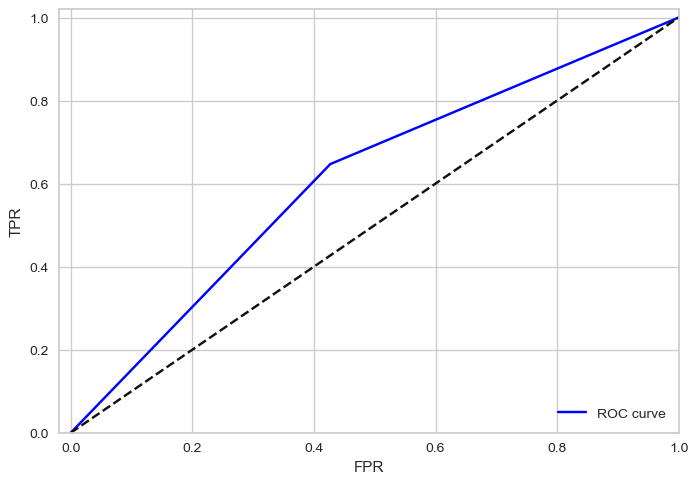

In [98]:
from sklearn.metrics import roc_curve

probs=knn_best.predict_proba(X_test)
y_pred_proba = probs[:,1]
                     
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

## 4) SVM:

Support Vector Machines (SVM) fue desarrollado para clasificaciones binarias, pero ha sido extendido para clasificaciones multiclases y regresión.

### SVM para Clasificación (SVC):

In [5]:
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='sigmoid')
svc.fit(X_train,y_train)

SVC(kernel='sigmoid', probability=True)

              precision    recall  f1-score   support

           0       0.97      0.49      0.65      1749
           1       0.03      0.47      0.05        51

    accuracy                           0.49      1800
   macro avg       0.50      0.48      0.35      1800
weighted avg       0.94      0.49      0.64      1800

La precisión del modelo es: 50.61 %


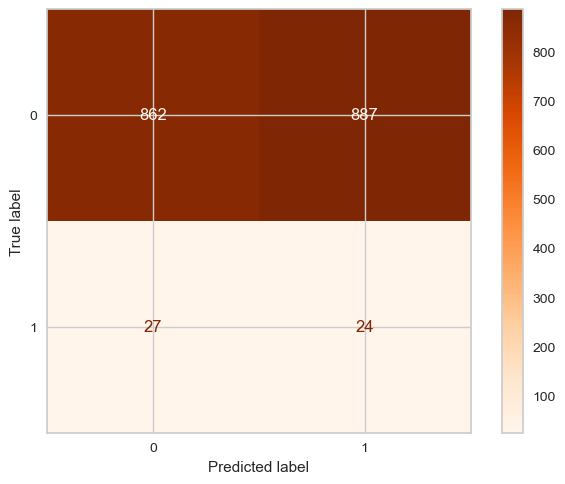

In [24]:
y_pred=svc.predict(X_test)
SVC=svc.predict_proba(X_test)
svs_model = svc.fit(X_train,y_train)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges"))
print('La precisión del modelo es:', np.round(y_pred.mean()*100, 2), '%')

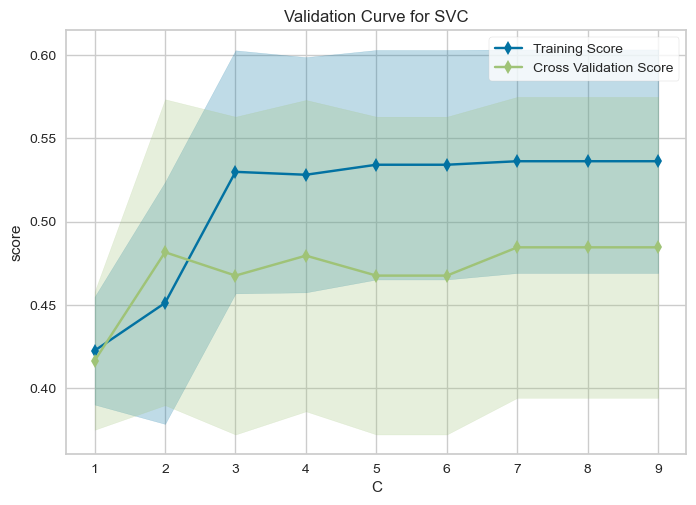

In [18]:
from yellowbrick.model_selection import ValidationCurve
c=np.arange(1,10)
k=ValidationCurve(svc,param_name='C', param_range=c, cv=4, scoring='f1_weighted',n_jobs=4)
k.fit(X_train,y_train)
k.show();

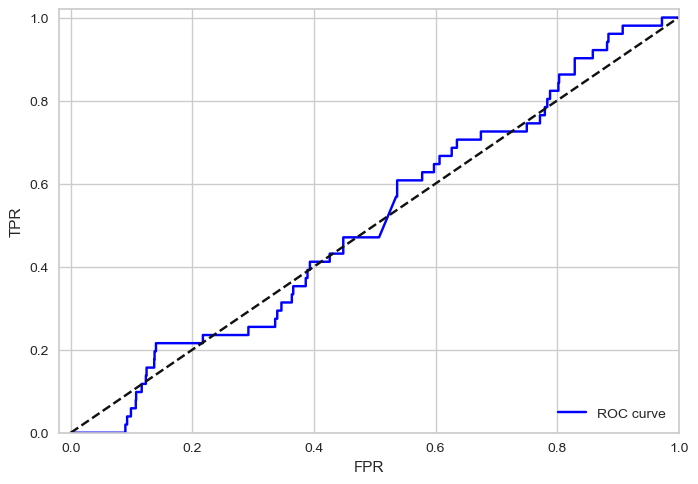

In [25]:
from sklearn.metrics import roc_curve

probs = svs_model.predict_proba(X_test)
y_pred_proba = probs[:,1]
                     
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = ShuffleSplit(n_splits=3)
results = cross_val_score(svc, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

0.4375
0.05103103630798288


## 5) Redes neuronales:
El primer método a utilizar es el de Multi Layer Perceptron. En este caso se recomienda estandarizar las variables, utilizando la función scaler. Y para generar el modelo se utilizarán dos capas escondidas, una de 5 neuronas y otra de 2 neuronas, con un número de 500 interacciones. Existen muchos mas parametros del modelo que se pueden ajustar en la página web de la librería.

In [22]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,5),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [23]:
y_pred = mlp.predict(X_test)

In [24]:
mlp.score(X_test,y_test)

0.08944444444444444

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
results = cross_val_score(mlp, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

0.48888888888888893
0.05968048222121161


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.07      0.14      1765
           1       0.02      0.86      0.04        35

    accuracy                           0.09      1800
   macro avg       0.49      0.47      0.09      1800
weighted avg       0.94      0.09      0.14      1800



In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 131 1634]
 [   5   30]]


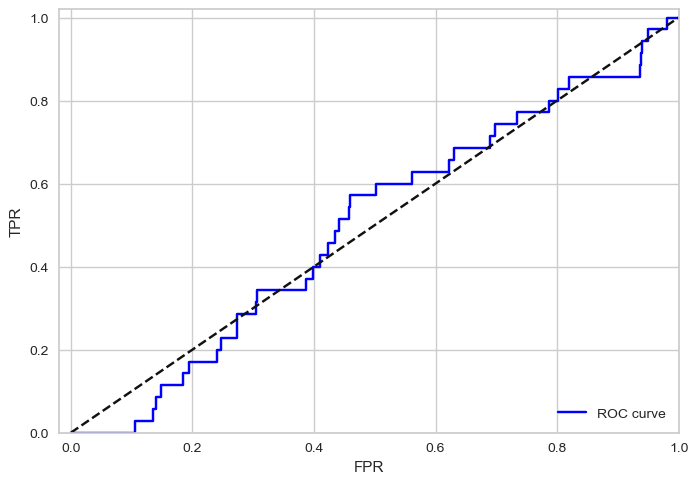

In [47]:
from sklearn.metrics import roc_curve

probs = mlp.predict_proba(X_test)
y_pred_proba = probs[:,1]
                     
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)

In [ ]:
from yellowbrick.model_selection import ValidationCurve
h=np.arange(1,10)
k=ValidationCurve(mlp,param_name='max_iter', param_range=h, cv=kfold, scoring='f1_weighted',n_jobs=4)
k.fit(X,y)
k.show();

## 6) Ensambles:


Los dos métodos de ensamblajes mas populares son:

Bagging. Entrena y acopla múltiples modelos, generalmente del mismo tipo, de forma paralela e independiente con diferentes conjuntos de muestras de entrenamiento.

Boosting. Entrena y acopla múltiples modelos, generalmente del mismo tipo, de forma secuencial y donde cada modelo individual aprende del error del modelo previo.

Bagging
Agregacion tipo Bagging consiste en acoplar múltiples modelos tomando conjunto de muestras de entrenamiento aleatorias, con reemplazamiento. El resultado final es un promedio o moda de todas las predicciones de los submodelos. Los modelos tipos Bagging mas conocidos son: (i) Bagged Decision Trees, (ii) Random Forest.

### Decision tree & Bagged Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=2)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10)

In [ ]:
print(f'Decision tree has {dtc.tree_.node_count} nodes with maximum depth {dtc.tree_.max_depth}.')

Decision tree has 41 nodes with maximum depth 6.


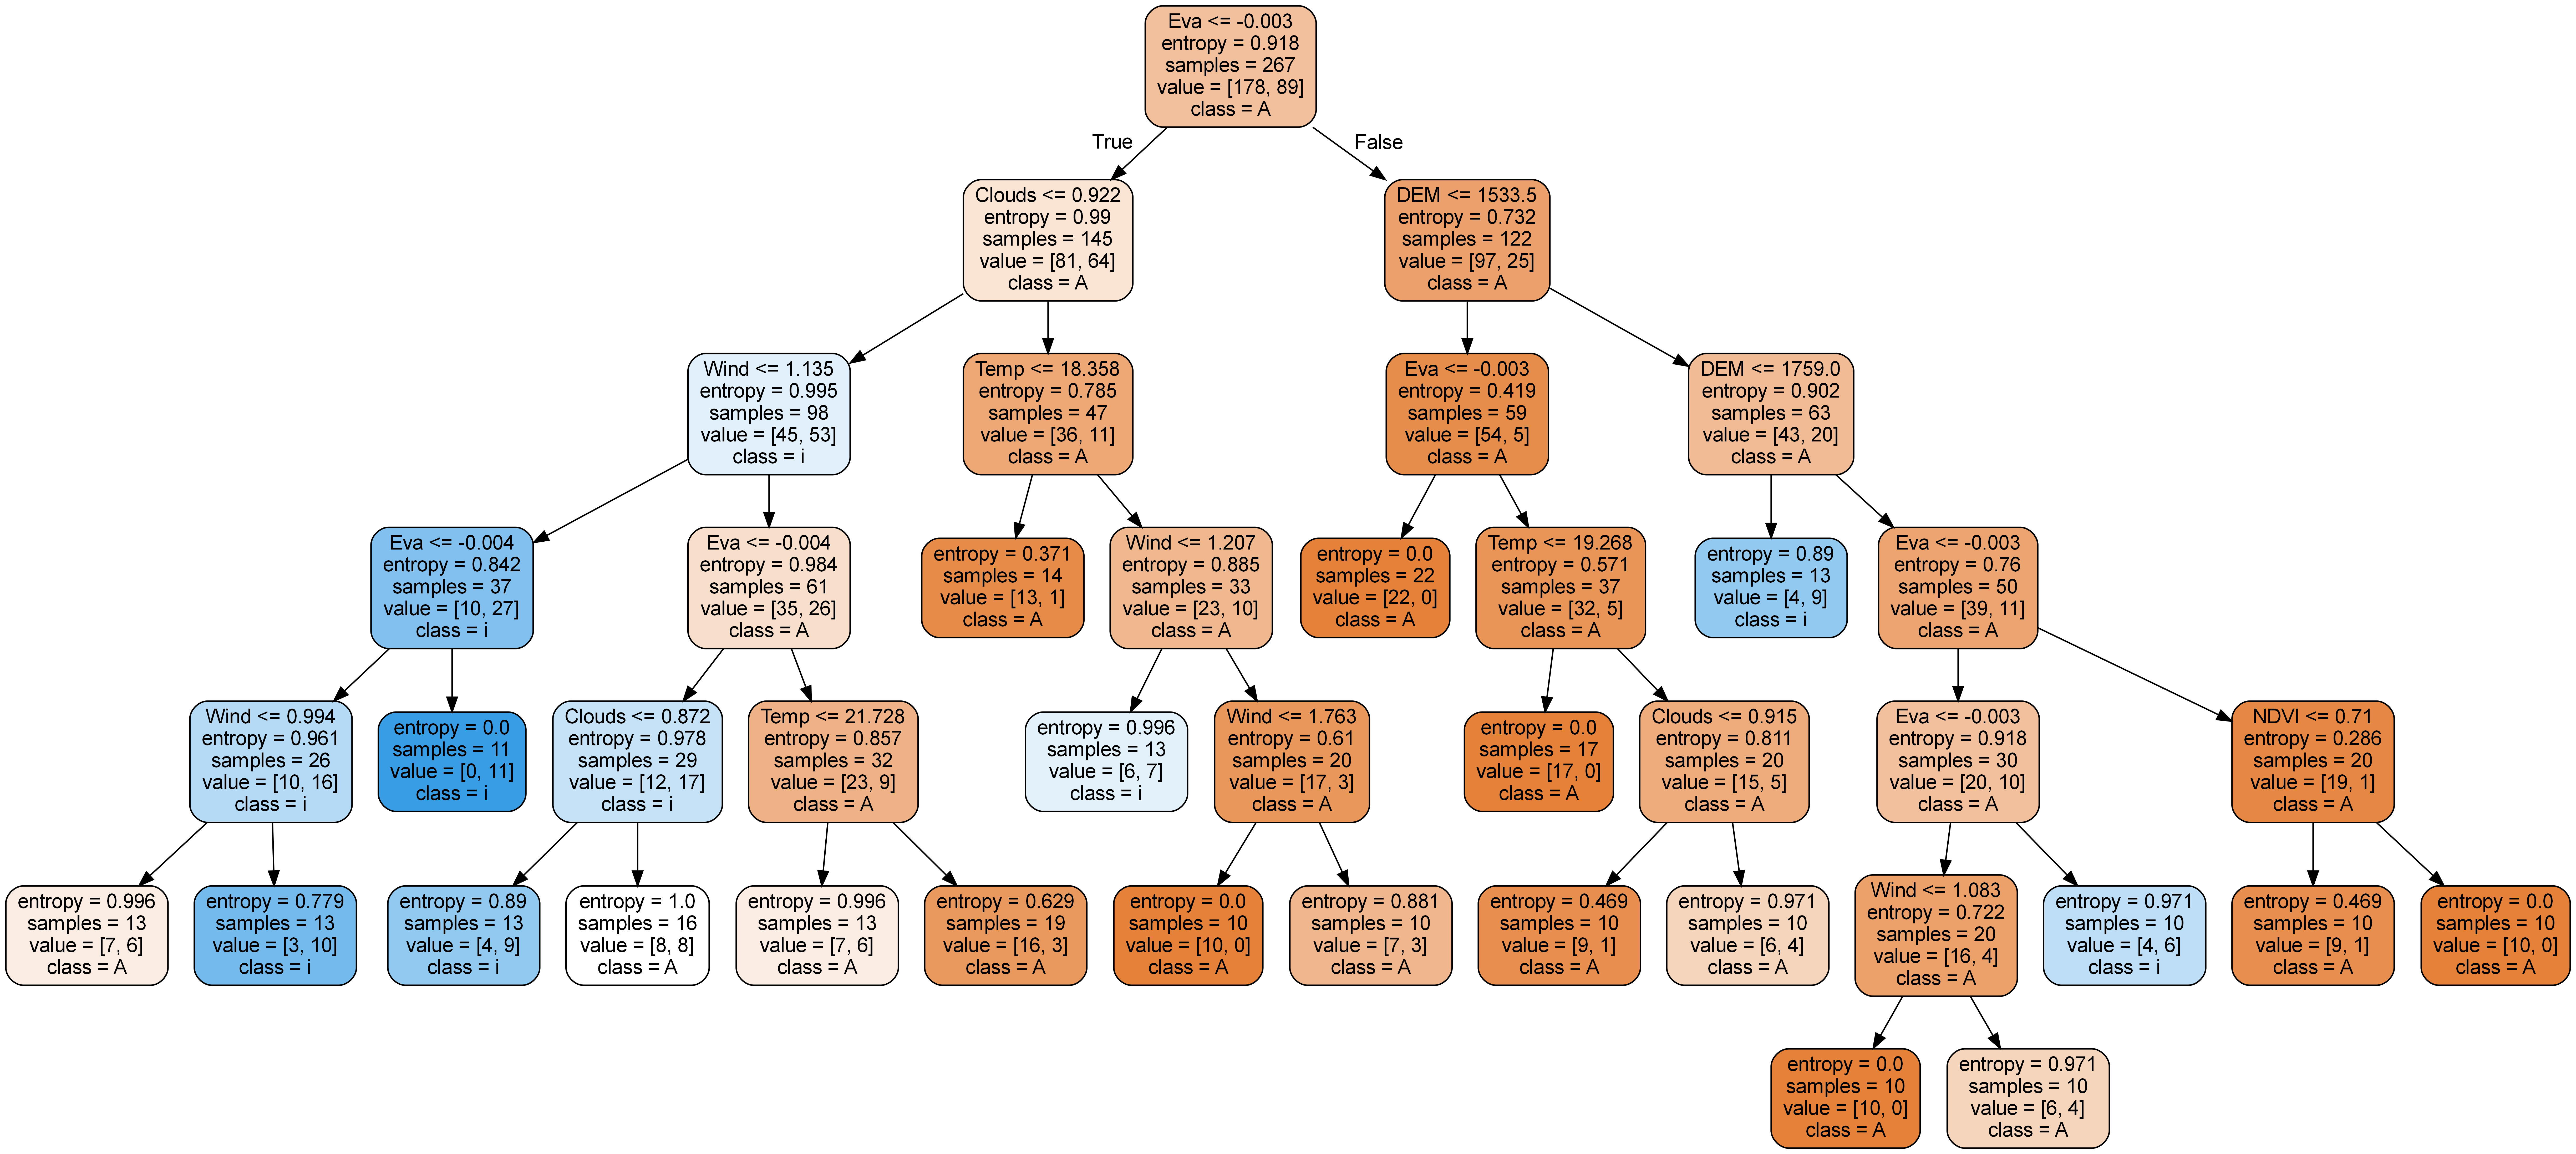

In [ ]:
from sklearn.tree import export_graphviz

# Para exportar a .dot
export_graphviz(dtc,'tree.dot', rounded=True, max_depth=10, feature_names=X_train.columns, class_names="AirTempCategory", 
                filled=True)

# Para convertir a png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400']);
#Si no transforma el archivo tree.dot, vaya a http://www.webgraphviz.com/ e ingrese el archivo dot para visualizarlo.

from IPython.display import Image
Image(filename='tree.png')

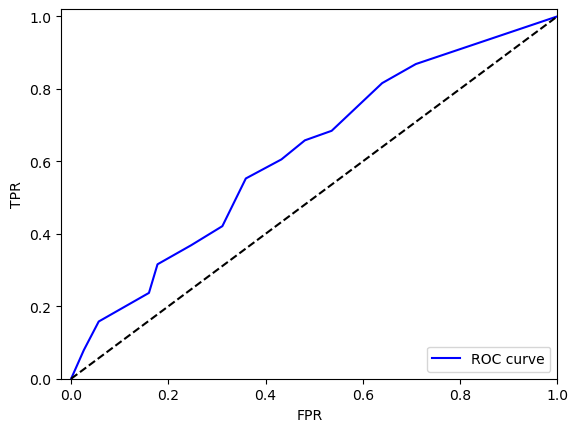

In [ ]:
from sklearn.metrics import roc_curve

probs = dtc.predict_proba(X_test)
y_pred_proba = probs[:,1]
                     
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)

In [ ]:
y_pred = dtc.predict(X_test)
print(dtc.score(X_test,y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

0.745
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1762
           1       0.03      0.37      0.06        38

    accuracy                           0.74      1800
   macro avg       0.51      0.56      0.46      1800
weighted avg       0.96      0.74      0.84      1800



In [ ]:
importances = list(dtc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances

[('LandCover', 0.0),
 ('Wind', 0.22),
 ('DEM', 0.16),
 ('NDVI', 0.01),
 ('Clouds', 0.13),
 ('Temp', 0.11),
 ('Eva', 0.37)]

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=dtc, n_estimators=10)
bc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        min_samples_leaf=10,
                                                        min_samples_split=10),
                  n_estimators=1000)

In [ ]:
y_pred = bc.predict(X_test)
print(bc.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.8655555555555555
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1762
           1       0.05      0.29      0.08        38

    accuracy                           0.87      1800
   macro avg       0.52      0.58      0.51      1800
weighted avg       0.96      0.87      0.91      1800



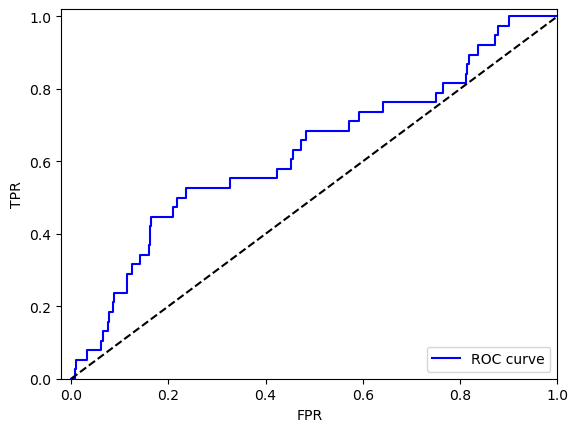

In [ ]:
from sklearn.metrics import roc_curve

probs = bc.predict_proba(X_test)
y_pred_proba = probs[:,1]
                     
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)

In [180]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
results = cross_val_score(bc, X_train, y_train, cv=kfold)
print(results.mean())

0.630952380952381


In [181]:
from sklearn.svm import SVC
svc=SVC()
bc_svc = BaggingClassifier(base_estimator=svc, n_estimators=100, random_state=1)
bc_svc.fit(X,y)

BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=1)

In [182]:
y_pred = bc_svc.predict(X_test)
print(bc_svc.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.9783333333333334
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1761
           1       0.00      0.00      0.00        39

    accuracy                           0.98      1800
   macro avg       0.49      0.50      0.49      1800
weighted avg       0.96      0.98      0.97      1800



### Random Forests:

In [248]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=6)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=6)

In [249]:
y_pred = rf.predict(X_test)
print(rf.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.6727777777777778
              precision    recall  f1-score   support

           0       0.99      0.68      0.80      1761
           1       0.04      0.54      0.07        39

    accuracy                           0.67      1800
   macro avg       0.51      0.61      0.43      1800
weighted avg       0.96      0.67      0.79      1800



In [243]:
results = cross_val_score(rf, X_train, y_train, cv=kfold)
print(results.mean())

0.6082539682539683


In [91]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances

[('LandCover', 0.04),
 ('Wind', 0.17),
 ('DEM', 0.1),
 ('NDVI', 0.13),
 ('Clouds', 0.24),
 ('Temp', 0.16),
 ('Eva', 0.17)]

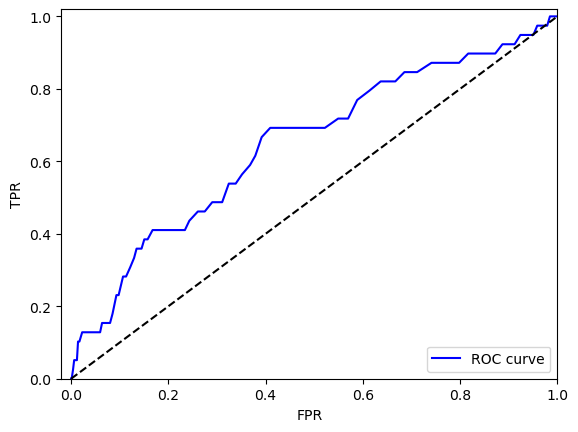

In [250]:
from sklearn.metrics import roc_curve

probs = rf.predict_proba(X_test)
y_pred_proba = probs[:,1]
                     
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)

### Boosting Algorithms
Los algortimso de ensamble crean una secuencia de modelos que aprenden de los errores de los modelos previos. Posteriormente las predicciones las realiza el modelo sopesado. Los dos algoritmos tipo Boosting son: (i) AdaBoost, y (ii) Stochastic Gradient Boosting.

### AdaBoost:

In [277]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=8, random_state=1)
adb.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=8, random_state=1)

In [278]:
y_pred = adb.predict(X_test)
print(adb.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.4255555555555556
              precision    recall  f1-score   support

           0       0.99      0.42      0.59      1761
           1       0.03      0.72      0.05        39

    accuracy                           0.43      1800
   macro avg       0.51      0.57      0.32      1800
weighted avg       0.96      0.43      0.58      1800



In [279]:
importances = list(adb.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances

[('LandCover', 0.0),
 ('Wind', 0.12),
 ('DEM', 0.12),
 ('NDVI', 0.0),
 ('Clouds', 0.25),
 ('Temp', 0.12),
 ('Eva', 0.38)]

In [280]:
results = cross_val_score(adb, X_train, y_train, cv=kfold)
print(results.mean())

0.5738095238095238


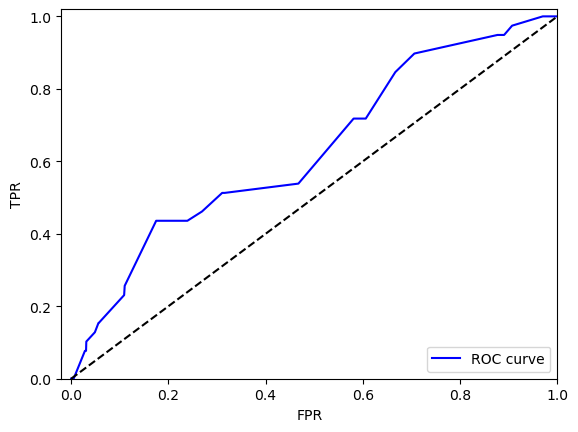

In [281]:
from sklearn.metrics import roc_curve

probs = adb.predict_proba(X_test)
y_pred_proba = probs[:,1]
                     
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)

In [336]:
len(y_pred_proba)

1800

In [295]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=2, random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=2, random_state=1)

In [296]:
y_pred = gbc.predict(X_test)
print(gbc.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.5555555555555556
              precision    recall  f1-score   support

           0       0.98      0.55      0.71      1761
           1       0.03      0.59      0.05        39

    accuracy                           0.56      1800
   macro avg       0.51      0.57      0.38      1800
weighted avg       0.96      0.56      0.70      1800



In [284]:
results = cross_val_score(gbc, X_train, y_train, cv=kfold)
print(results.mean())

0.608095238095238


In [179]:
importances = list(gbc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances

[('LandCover', 0.01),
 ('Wind', 0.22),
 ('DEM', 0.03),
 ('NDVI', 0.11),
 ('Clouds', 0.28),
 ('Temp', 0.16),
 ('Eva', 0.19)]